# Trabajo Práctico Nº 1

Objetivos:
* Aplicar conceptos de procesamiento de señales en python, como convolución.
* Familiarizarse con el entorno de desarrollo de python notebooks

## Ejercicios
1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).

2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz. Analizar los resultados.

3- Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint'), comparar tiempos y error a la salida. (Compararlo con np.convolve). Sacar conclusiones sobre los resultados.
Medir tiempos de computo con el método: timeit de la lib timeit de la siguiente forma:

La diferencia en la medición depende de la carga de la CPU y que el primer método mide solamente la función pedida. Usar uno de los 2 para realizar la medición, como la medición es comparativa, solo importa usar el mismo método para todo, los valores absolutos no importan.

In [ ]:
#1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).

#2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz.
#   Analizar los resultados.

#3- Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint'),
#   comparar tiempos y error a la salida. (Compararlo con np.convolve).
#   Sacar conclusiones sobre los resultados.

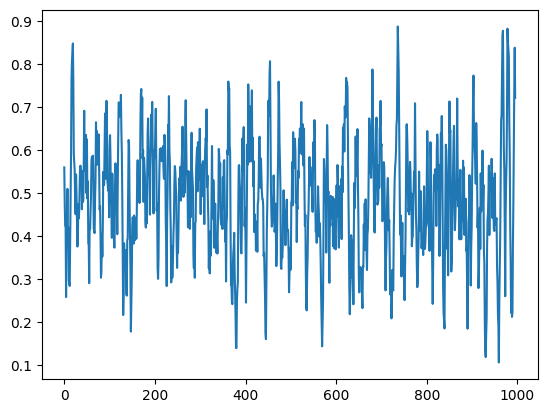

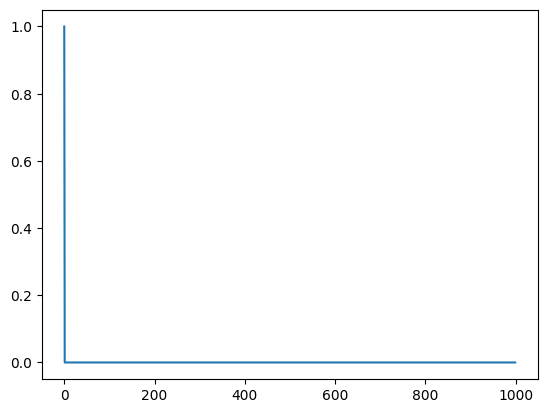

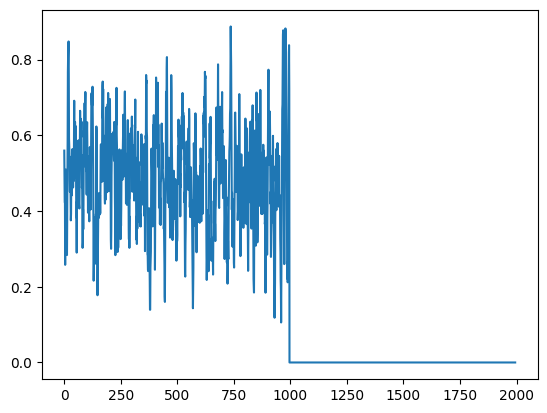

In [ ]:
#1 defino la media movil y obtengo su transferencia
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

valores = np.random.rand(1000)
ventana = 5

def media_movil(valores, ventana):
  media_movil = np.array([])
  for i in range(len(valores) - ventana + 1):
    ventana_actual = valores[i:i+ventana]
    media = sum(ventana_actual) / ventana
    media_movil = np.append(media_movil, media)
  return media_movil

transfer = np.convolve(media_movil(valores, ventana), sig.unit_impulse(len(valores)), mode = 'full')
plt.plot(media_movil(valores, ventana))
plt.show()
plt.plot(sig.unit_impulse(len(valores)))
plt.show()
plt.plot(transfer)
plt.show()

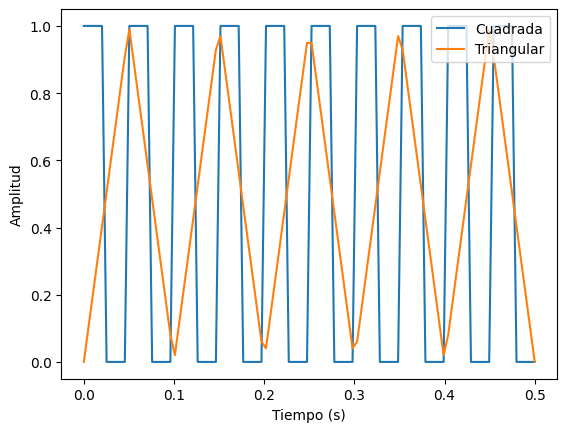

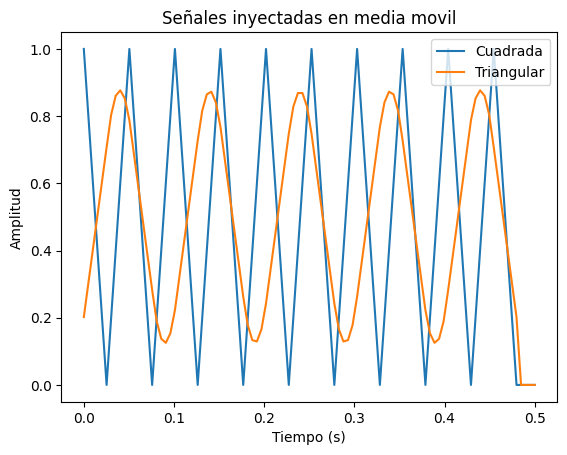

In [ ]:
#2-Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz.
t_cuadrada = np.linspace(0, 0.5, 100)
t_triangular = np.linspace(0, 0.5, 100)
cuadrada = (sig.square(2 * np.pi * 2000 * t_cuadrada) + 1) * 0.5
triangular = (sig.sawtooth(2 * np.pi * 1000 * t_triangular, width = 0.5) + 1) * 0.5

plt.plot(t_cuadrada, cuadrada, label = "Cuadrada")
plt.plot(t_triangular, triangular, label = "Triangular")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc='upper right')
plt.show()

#Inyectar las señales a la media movil
media_movil_cuadrada = media_movil(cuadrada, ventana)
media_movil_triangular = media_movil(triangular, ventana)
#agrego 0 para igualar cantidad de elementos
for e in range(4):
  media_movil_cuadrada = np.append(media_movil_cuadrada, 0)
for r in range(4):
  media_movil_triangular = np.append(media_movil_triangular, 0)

plt.plot(t_cuadrada, media_movil_cuadrada, label = "Cuadrada")
plt.plot(t_triangular, media_movil_triangular, label = "Triangular")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc='upper right')
plt.title("Señales inyectadas en media movil")
plt.show()

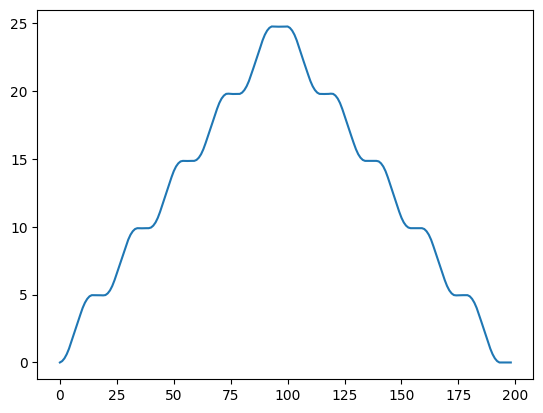

Tiempo de convolucion con punto fijo: 0.9198193550109863


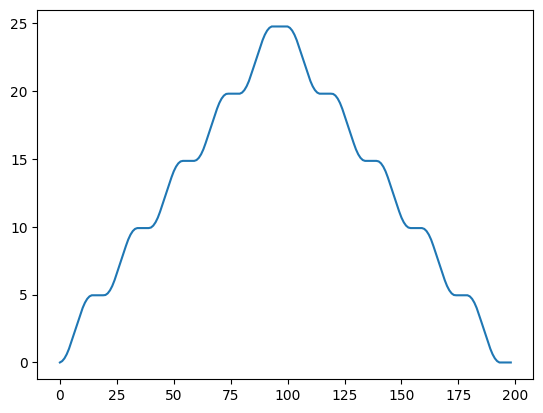

Tiempo de convolucion con punto flotante: 0.006518363952636719


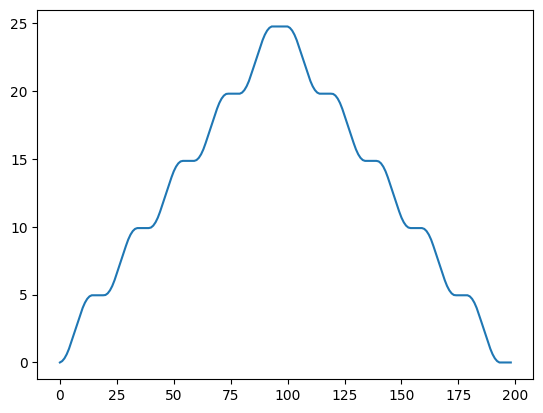

Tiempo de convolucion con numpy: 0.00017786026000976562


In [ ]:
#3- Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint'),
#   comparar tiempos y error a la salida. (Compararlo con np.convolve).
#   Sacar conclusiones sobre los resultados.

#instalo la libreria de fixedpoint
!pip install fixedpoint
from fixedpoint import FixedPoint
# para float no hago nada porque es el tipo que maneja python por default
import time

def numpy_to_fixed(array):
  M, N = 1, 7
  array_fixed = []
  for cont in range(len(array)):
    array_fixed.append(FixedPoint(array[cont], n = N, m = M))
  return array_fixed

cuadrada_fixed = numpy_to_fixed(cuadrada)
triangular_fixed = numpy_to_fixed(triangular)

def convolucion(signal_1, signal_2):
  len_convolve = len(signal_1) + len(signal_2) - 1
  signal_convolve = [0] * len_convolve
  for aux in range(len_convolve):
    for aux_2 in range(len(signal_1)):
      if aux - aux_2 >= 0 and aux - aux_2 < len(signal_2):
        signal_convolve[aux] += signal_1[aux_2] * signal_2[aux - aux_2]
  return signal_convolve

#convolucion fixed_point:
start_fixed = time.time()
convolucion_fixed = convolucion(cuadrada_fixed, triangular_fixed)
end_fixed = time.time()

#convolucion float:
start_float = time.time()
convolucion_float = convolucion(cuadrada, triangular)
end_float = time.time()

#convolucion numpy:
start_numpy = time.time()
convolucion_numpy = np.convolve(cuadrada, triangular, mode = 'full')
end_numpy = time.time()

plt.plot(convolucion_fixed)
plt.show()
print("Tiempo de convolucion con punto fijo: " + str(end_fixed - start_fixed))

plt.plot(convolucion_float)
plt.show()
print("Tiempo de convolucion con punto flotante: " + str(end_float - start_float))

plt.plot(convolucion_numpy)
plt.show()
print("Tiempo de convolucion con numpy: " + str(end_numpy - start_numpy))